<a href="https://colab.research.google.com/github/BaselAtiyire/CS585DEMOProject/blob/main/TWITTER_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving twitter_training.csv to twitter_training.csv
Saving twitter_validation.csv to twitter_validation.csv
Training set sample:


,tweet_id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Validation set sample:


,tweet_id,topic,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


Training shape: (74682, 4)
Validation shape: (1000, 4)

Training Sentiment Distribution:


,count
sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990



Validation Sentiment Distribution:


,count
sentiment,
Neutral,285
Positive,277
Negative,266
Irrelevant,172


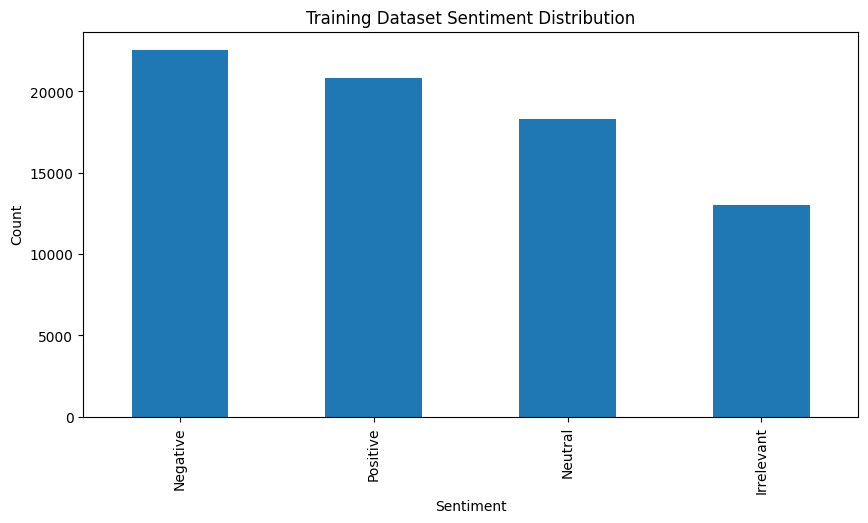

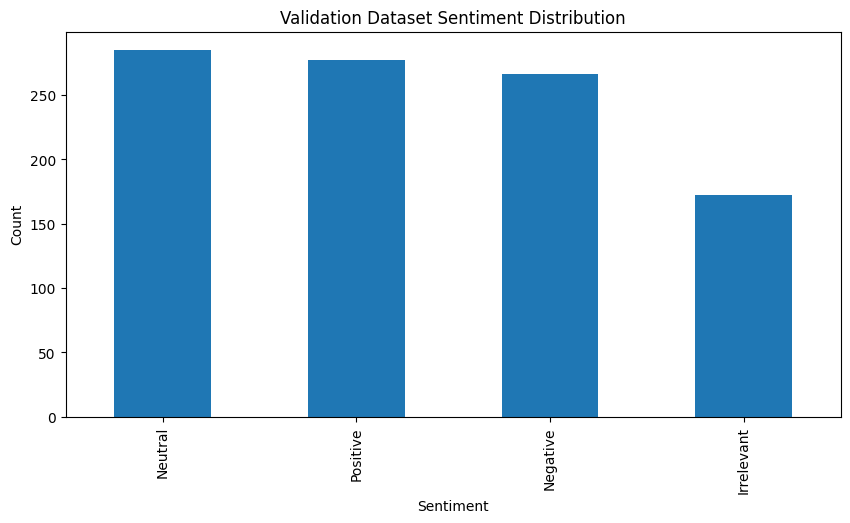

Training duplicated rows: 2700
Validation duplicated rows: 0

Unique topics in training: 32
Unique topics in validation: 32


In [5]:
# ============================
#  STEP 1: Upload the files
# ============================
from google.colab import files
uploaded = files.upload()

# After uploading, your files will appear in the dictionary "uploaded"
# Example expected names:
# twitter_training.csv
# twitter_validation.csv

# ============================
#  STEP 2: Load the datasets
# ============================
import pandas as pd

train = pd.read_csv("twitter_training.csv", header=None)
val = pd.read_csv("twitter_validation.csv", header=None)

# Rename columns for readability
train.columns = ["tweet_id", "topic", "sentiment", "text"]
val.columns = ["tweet_id", "topic", "sentiment", "text"]

# ============================
#  STEP 3: Show samples
# ============================
print("Training set sample:")
display(train.head())

print("Validation set sample:")
display(val.head())

# ============================
#  STEP 4: Show shapes
# ============================
print("Training shape:", train.shape)
print("Validation shape:", val.shape)

# ============================
#  STEP 5: Sentiment distribution
# ============================
print("\nTraining Sentiment Distribution:")
display(train['sentiment'].value_counts())

print("\nValidation Sentiment Distribution:")
display(val['sentiment'].value_counts())

# ============================
# STEP 6: Compare distributions visually
# ============================
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
train['sentiment'].value_counts().plot(kind='bar')
plt.title("Training Dataset Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,5))
val['sentiment'].value_counts().plot(kind='bar')
plt.title("Validation Dataset Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# ============================
# STEP 7: Check duplicates
# ============================
print("Training duplicated rows:", train.duplicated().sum())
print("Validation duplicated rows:", val.duplicated().sum())

# ============================
# STEP 8: Compare topic variety
# ============================
print("\nUnique topics in training:", train['topic'].nunique())
print("Unique topics in validation:", val['topic'].nunique())


In [6]:
# Check for missing values
print("Missing values in training:")
print(train.isna().sum())

print("\nMissing values in validation:")
print(val.isna().sum())

# Drop rows where text or sentiment is missing (if any)
train = train.dropna(subset=["text", "sentiment"])
val = val.dropna(subset=["text", "sentiment"])

print("\nShapes after dropping missing:")
print("Training:", train.shape)
print("Validation:", val.shape)


Missing values in training:
tweet_id       0
topic          0
sentiment      0
text         686
dtype: int64

Missing values in validation:
tweet_id     0
topic        0
sentiment    0
text         0
dtype: int64

Shapes after dropping missing:
Training: (73996, 4)
Validation: (1000, 4)


In [7]:
print("Training sentiment distribution:")
print(train["sentiment"].value_counts())

print("\nValidation sentiment distribution:")
print(val["sentiment"].value_counts())


Training sentiment distribution:
sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

Validation sentiment distribution:
sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64


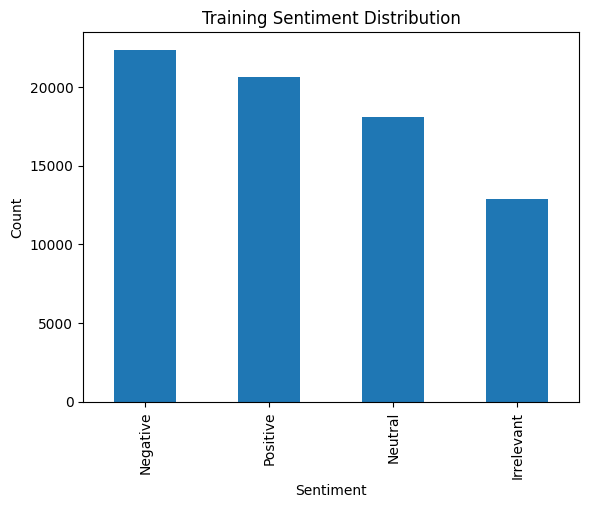

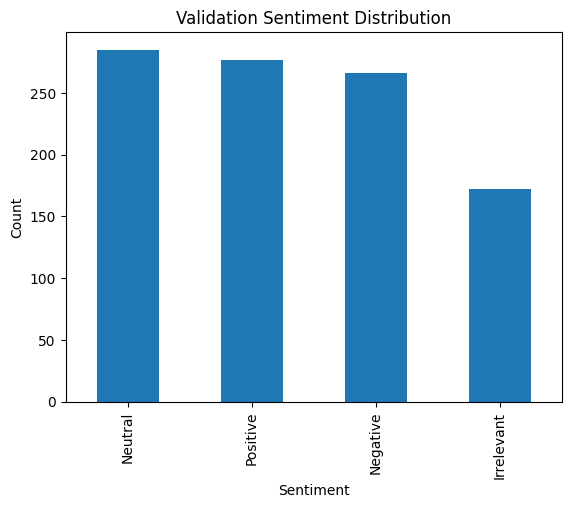

In [8]:
import matplotlib.pyplot as plt

plt.figure()
train["sentiment"].value_counts().plot(kind="bar")
plt.title("Training Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

plt.figure()
val["sentiment"].value_counts().plot(kind="bar")
plt.title("Validation Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# === Encode labels (sentiments) as numbers ===
label_encoder = LabelEncoder()
y_train_full = label_encoder.fit_transform(train["sentiment"])
y_val = label_encoder.transform(val["sentiment"])

print("Label classes:", label_encoder.classes_)


Label classes: ['Irrelevant' 'Negative' 'Neutral' 'Positive']


In [10]:
X_train_full = train["text"].astype(str)

X_train, X_dev, y_train, y_dev = train_test_split(
    X_train_full,
    y_train_full,
    test_size=0.1,
    random_state=42,
    stratify=y_train_full
)

print("Train size:", X_train.shape[0])
print("Dev size:", X_dev.shape[0])


Train size: 66596
Dev size: 7400


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline: TF-IDF vectorizer + Logistic Regression classifier
clf = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=20000,
        ngram_range=(1,2),    # unigrams + bigrams
        stop_words="english"  # remove English stopwords
    )),
    ("logreg", LogisticRegression(
        max_iter=1000,
        n_jobs=-1
    ))
])

# Train the model
clf.fit(X_train, y_train)
print("✅ Model training complete")


✅ Model training complete


In [12]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# === Dev set evaluation ===
y_dev_pred = clf.predict(X_dev)
print("Dev Accuracy:", accuracy_score(y_dev, y_dev_pred))
print("\nDev Classification Report:")
print(classification_report(y_dev, y_dev_pred, target_names=label_encoder.classes_))


Dev Accuracy: 0.7959459459459459

Dev Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.84      0.67      0.75      1287
    Negative       0.77      0.89      0.82      2236
     Neutral       0.81      0.75      0.78      1811
    Positive       0.80      0.82      0.81      2066

    accuracy                           0.80      7400
   macro avg       0.80      0.78      0.79      7400
weighted avg       0.80      0.80      0.79      7400



In [13]:
# === Validation set evaluation (using your twitter_validation.csv) ===
X_val = val["text"].astype(str)
y_val_pred = clf.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))


Validation Accuracy: 0.899

Validation Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.90      0.87      0.88       172
    Negative       0.87      0.94      0.90       266
     Neutral       0.93      0.87      0.90       285
    Positive       0.90      0.91      0.91       277

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



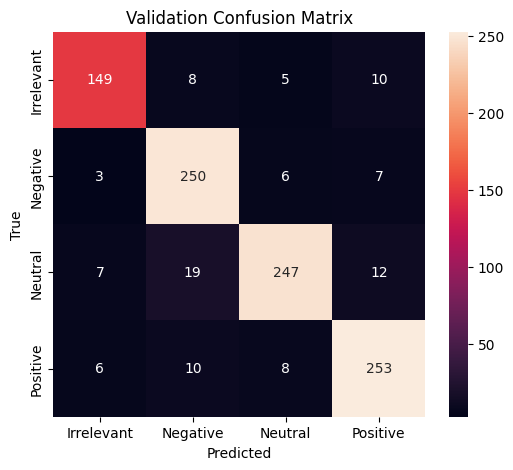

In [14]:
import seaborn as sns  # if it errors, run: !pip install seaborn
import numpy as np

cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Validation Confusion Matrix")
plt.show()


In [15]:
def predict_sentiment(texts):
    if isinstance(texts, str):
        texts = [texts]
    preds = clf.predict(texts)
    labels = label_encoder.inverse_transform(preds)
    return list(zip(texts, labels))

examples = [
    "I love this product, it is amazing!",
    "This is the worst service I have ever had.",
    "Not sure how I feel about this."
]

for t, s in predict_sentiment(examples):
    print(f"Text: {t}\nPredicted sentiment: {s}\n")


Text: I love this product, it is amazing!
Predicted sentiment: Positive

Text: This is the worst service I have ever had.
Predicted sentiment: Negative

Text: Not sure how I feel about this.
Predicted sentiment: Positive

